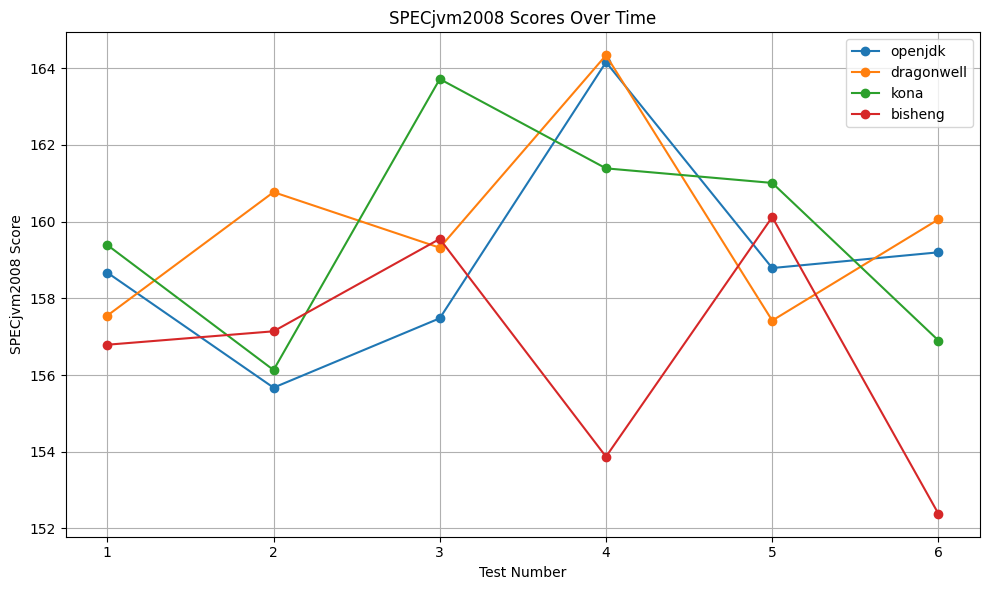

[158.99499999999998, 159.91, 159.75666666666666, 156.64166666666665]
[2.836115300900162, 2.5496980213350784, 2.877301976968468, 3.055208121661548]


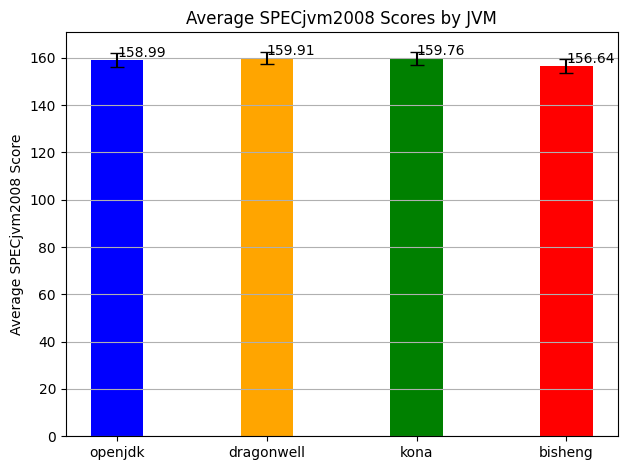

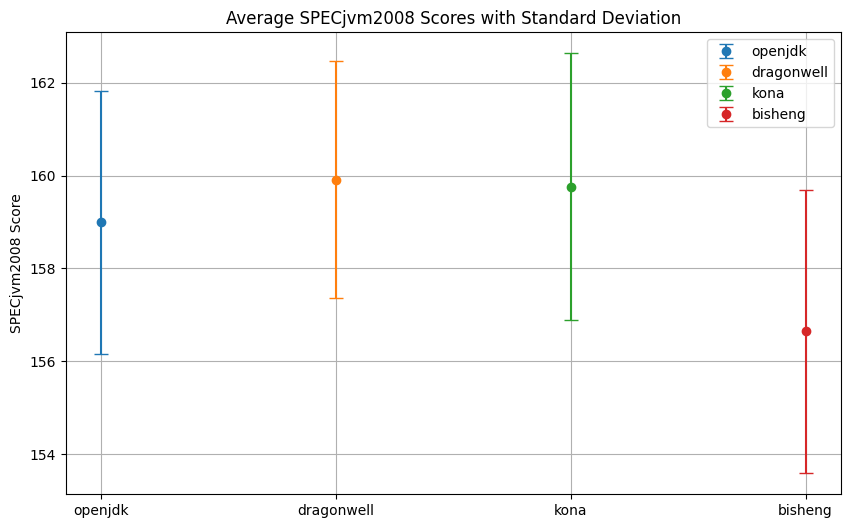

In [17]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import shapiro, levene

# 准备数据
scores = {
    'openjdk': [158.67, 155.67, 157.48, 164.16, 158.79, 159.2],
    'dragonwell': [157.55, 160.77, 159.32, 164.34, 157.42, 160.06],
    'kona': [159.39, 156.13, 163.72, 161.39, 161.01, 156.9],
    'bisheng': [156.79, 157.14, 159.55, 153.87, 160.12, 152.38]
}

# x轴
x = list(range(1, len(scores['openjdk']) + 1))

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制每个 JVM 的曲线
for jvm, score in scores.items():
    plt.plot(x, score, marker='o', label=jvm)

# 添加图表信息
plt.title('SPECjvm2008 Scores Over Time')
plt.xlabel('Test Number')
plt.ylabel('SPECjvm2008 Score')
plt.legend()
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()


# 计算均值和标准偏差
means = {key: np.mean(value) for key, value in scores.items()}
std_devs = {key: np.std(value, ddof=1) for key, value in scores.items()}


# 可视化
labels = list(scores.keys())
mean_values = list(means.values())
std_dev_values = list(std_devs.values())

print(mean_values)
print(std_dev_values)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, mean_values, width, yerr=std_dev_values, capsize=5, color=['blue', 'orange', 'green', 'red'])

# 添加文本标签
ax.set_ylabel('Average SPECjvm2008 Score')
ax.set_title('Average SPECjvm2008 Scores by JVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# 显示均值值
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

# 细致可视化均值和方差
plt.figure(figsize=(10, 6))
for jvm in scores:
    plt.errorbar(jvm, means[jvm], yerr=std_devs[jvm], fmt='o', capsize=5, label=jvm)
plt.ylabel('SPECjvm2008 Score')
plt.title('Average SPECjvm2008 Scores with Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# JVM 数据
scores = {
    'openjdk': [158.67, 155.67, 157.48, 164.16, 158.79, 159.2],
    'dragonwell': [157.55, 160.77, 159.32, 164.34, 157.42, 160.06],
    'kona': [159.39, 156.13, 163.72, 161.39, 161.01, 156.9],
    'bisheng': [156.79, 157.14, 159.55, 153.87, 160.12, 152.38]
}

# 检验每组数据的正态性
for jvm, data in scores.items():
    stat, p = shapiro(data)
    print(f"{jvm} Shapiro-Wilk Test: p-value = {p:.4f}")

# 方差齐性检验
data_groups = [scores[jvm] for jvm in scores]
stat, p = levene(*data_groups)
print(f"\nLevene Test for Homogeneity of Variances: p-value = {p:.4f}")

openjdk Shapiro-Wilk Test: p-value = 0.2734
dragonwell Shapiro-Wilk Test: p-value = 0.3937
kona Shapiro-Wilk Test: p-value = 0.7710
bisheng Shapiro-Wilk Test: p-value = 0.6104

Levene Test for Homogeneity of Variances: p-value = 0.9116


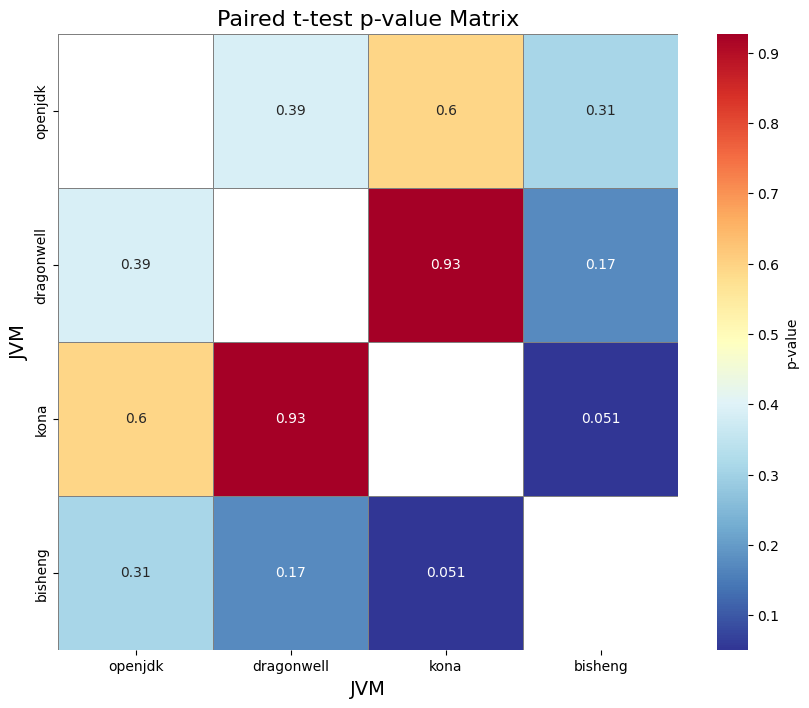

In [19]:
# JVM 名称列表
jvms = list(scores.keys())
n = len(jvms)

# 初始化 p 值矩阵
p_values_matrix = np.zeros((n, n))

# 计算 p 值矩阵
for i in range(n):
    for j in range(n):
        if i != j:
            _, p_value = ttest_rel(scores[jvms[i]], scores[jvms[j]])
            p_values_matrix[i, j] = p_value
        else:
            p_values_matrix[i, j] = np.nan  # 对角线置为 NaN

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_matrix, annot=True, cmap="RdYlBu_r", xticklabels=jvms, yticklabels=jvms, 
            cbar_kws={'label': 'p-value'}, linewidths=0.5, linecolor='gray')

# 设置标题和标签
plt.title('Paired t-test p-value Matrix', fontsize=16)
plt.xlabel('JVM', fontsize=14)
plt.ylabel('JVM', fontsize=14)

# 显示图形
plt.show()


In [20]:
# 转换为 DataFrame
df = pd.DataFrame({k: pd.Series(v) for k, v in scores.items()})
df_melt = df.melt(var_name='JVM', value_name='Score')

# 方差分析
model = ols('Score ~ C(JVM)', data=df_melt).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

              sum_sq    df         F    PR(>F)
C(JVM)     41.046417   3.0  1.701882  0.198754
Residual  160.788367  20.0       NaN       NaN


Data 1: W-statistic=0.9351680278778076, p-value=0.6205599904060364
Data 2: W-statistic=0.8809338808059692, p-value=0.2733733057975769
Levene test: W-statistic=1.8473890696120698, p-value=0.20394862185678694
T-test: T-statistic=10.291575509119257, p-value=1.2206799937734425e-06


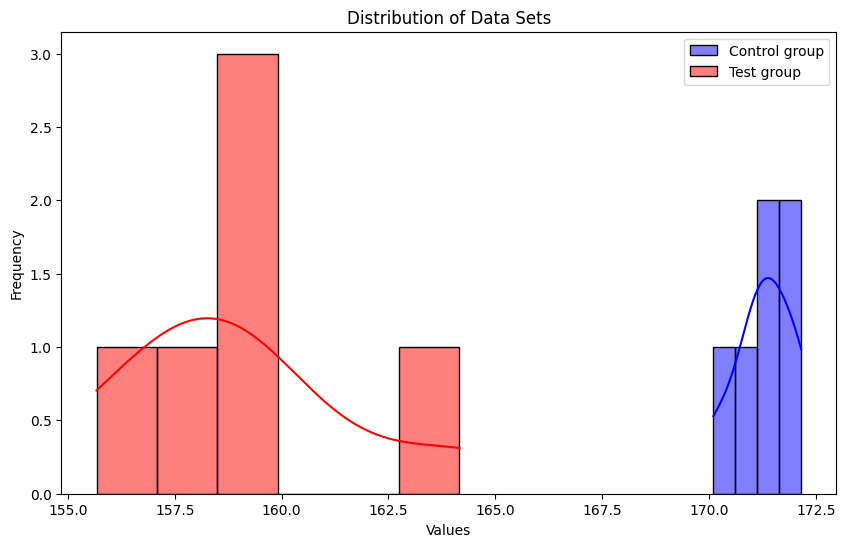

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
data1 = [171.95, 170.10, 172.15, 171.08, 171.31, 171.19]
data2 = [158.67, 155.67, 157.48, 164.16, 158.79, 159.2]

# 1. 正态性检验
shapiro_data1 = stats.shapiro(data1)
shapiro_data2 = stats.shapiro(data2)

print(f"Data 1: W-statistic={shapiro_data1.statistic}, p-value={shapiro_data1.pvalue}")
print(f"Data 2: W-statistic={shapiro_data2.statistic}, p-value={shapiro_data2.pvalue}")

# 2. 方差齐性检验
levene_test = stats.levene(data1, data2)
print(f"Levene test: W-statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# 3. 显著性差异检验
# 选择合适的 t 检验方法
if levene_test.pvalue > 0.05:
    t_test = stats.ttest_ind(data1, data2, equal_var=True)
else:
    t_test = stats.ttest_ind(data1, data2, equal_var=False)

print(f"T-test: T-statistic={t_test.statistic}, p-value={t_test.pvalue}")

# 可视化
plt.figure(figsize=(10, 6))
sns.histplot(data1, kde=True, color='blue', label='Control group')
sns.histplot(data2, kde=True, color='red', label='Test group')
plt.legend()
plt.title('Distribution of Data Sets')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


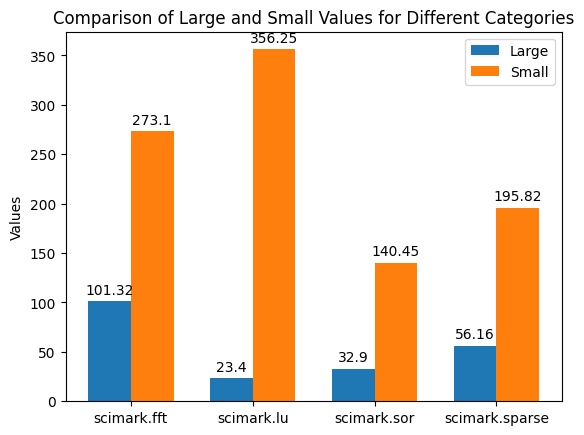

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ['scimark.fft', 'scimark.lu', 'scimark.sor', 'scimark.sparse']
large_values = [101.32, 23.4, 32.9, 56.16]
small_values = [273.1, 356.25, 140.45, 195.82]

# 设置图表位置
x = np.arange(len(categories))  # 分类标签的位置
width = 0.35  # 条形图的宽度

fig, ax = plt.subplots()

# 绘制条形图
bars_large = ax.bar(x - width/2, large_values, width, label='Large')
bars_small = ax.bar(x + width/2, small_values, width, label='Small')

# 添加标签和标题
ax.set_ylabel('Values')
ax.set_title('Comparison of Large and Small Values for Different Categories')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# 为条形图添加数据标签
ax.bar_label(bars_large, padding=3)
ax.bar_label(bars_small, padding=3)

# 显示图表
plt.show()
